In [1]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline
from sklearn import mixture

In [4]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz
oxy=data[:,0:52]
roi1=[46,47,48]
roi2=[18,28,29]
roi3=[13, 23, 24]
signal=oxy[:,roi1+roi2+roi3]

 I am loading the 0 repetition of the protocol


Consider only oxy data, discard the others

(2671, 52)


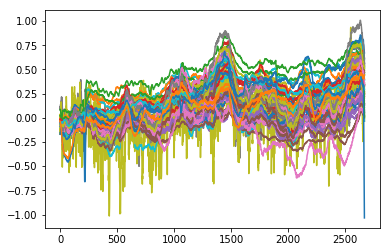

In [3]:

plot(oxy)#oxy
figure()
'''plot(data[:,52:104])#deoxy
figure()
plot(data[:,104:156])#oxy+#deoxy'''
print(shape(oxy))


Plot the signal in the three region of interest

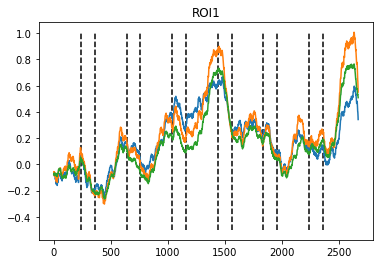

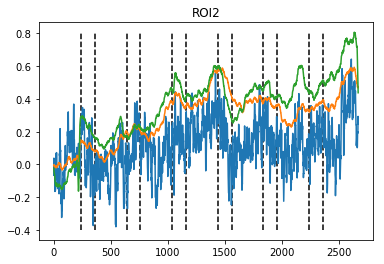

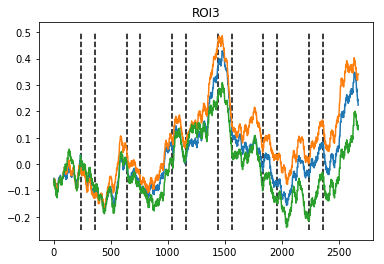

In [5]:
plot(oxy[:,roi1],label="ROI1")
vlines(trial,-0.5,1,linestyles="--")
title("ROI1")
figure()
vlines(trial,-0.4,0.8,linestyles="--")
plot(oxy[:,roi2],label="ROI2")
title("ROI2")
figure()
vlines(trial,-0.25,0.5,linestyles="--")
plot(oxy[:,roi3],label="ROI3")
title("ROI3")
#legend()

(2671, 9)


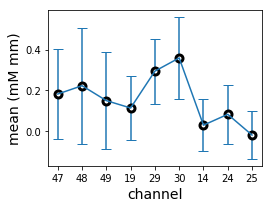

In [7]:
figure(figsize=(4,3))
signal=oxy[:,roi1+roi2+roi3]
print(shape(signal))
plot(mean(signal,axis=0),"wo",mec="k",ms=7,mew=3)
errorbar(arange(len(roi1+roi2+roi3)),mean(signal,axis=0),std(signal,axis=0),capsize=5)
ax=gca()
ax.set_xticks(arange(len(roi1+roi2+roi3)))
ax.set_xticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
xlabel("channel",fontsize=14)
ylabel("mean (mM mm)",fontsize=14)
tight_layout()
#savefig("./figure/mean.pdf")

(2671, 52)


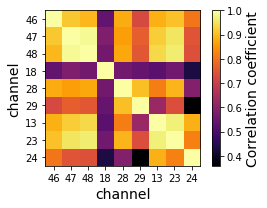

In [32]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
oxy2=data[:2658,:52]
#sampling rate 10 Hz
figure(figsize=(4,3))
imshow(corrcoef(oxy2[:,roi1+roi2+roi3],rowvar=False),aspect="equal",cmap="inferno")
print(shape(oxy))
ax=gca()
ax.set_xticks(arange(len(roi1+roi2+roi3)))
ax.set_yticks(arange(len(roi1+roi2+roi3)))
xlabel("channel",fontsize=14)
ylabel("channel",fontsize=14)
ax.set_xticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
ax.set_yticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
cbar=colorbar(orientation="vertical")
cbar.set_label('Correlation coefficient',fontsize=14)
tight_layout()
#savefig("./figure/covariance.pdf")

### Histogram
First the histogram over one single channel, namely the the 1st in ROI2 is employed. 

Then the 2d histogram over the channels.  

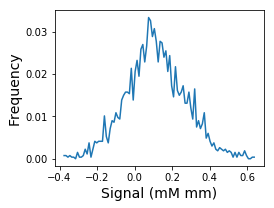

In [53]:
figure(figsize=(4,3))
h,b=histogram(signal[:,3],bins=100)
plot((b[:-1]+b[1:])/2,h/sum(h))
xlabel("Signal (mM mm)",fontsize=14)
ylabel("Frequency",fontsize=14)
tight_layout()
savefig("./figure/histogram.pdf")

Multidimensional histogram

In [ ]:
# store the trajectories along different channels
ss=[]
for i in arange(0,len(signal[0,:])):
    ss+=[signal[:,i]]


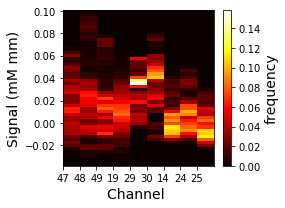

In [55]:
fig=figure(figsize=(4,3))
n_ybin=50;
## ss is a matrix of the type [channels, Time]
ch=shape(ss)[0]
T=shape(ss)[1]
x=tile(arange(0,ch),T)#repeats the arange array T times.
y=array(ss).flatten("F") #flattens the [channels, Time] matrix into 1-D array of channel*Time elements.
#Histogram is computed by looking at the number of times each point (x[i],y[i]) occurs. 
H,x_edges,y_edges=histogram2d(x,y,bins=[ch,n_ybin])
#creates  a  discrete colorbar from "hot"
# define the bins and normalize


#Normalise H to become a frequency
H=H/sum(H,axis=1)[0]
shape(H)
imshow(H.T,aspect="auto",extent=(0,ch,np.min(y)/10,np.max(y)/10),shape=(ch,n_ybin),cmap="hot",origin="lower")
cbar=colorbar()
cbar.set_label('frequency',fontsize=14)
ax=gca()
ax.set_xticks(arange(len(roi1+roi2+roi3)))
ax.set_xticklabels(list(array(roi1)+1)+list(array(roi2)+1)+list(array(roi3)+1))
xlabel("Channel ",fontsize=14)
ylabel("Signal (mM mm)",fontsize=14)

tight_layout()
#savefig("./figure/2dhistogram.pdf")

In [24]:
#check normalisation to 1
sum(H,axis=1)

array([ 2671.,  2671.,  2671.,  2671.,  2671.,  2671.,  2671.,  2671.,
        2671.])